In [5]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
data = pd.read_csv('PermutationResults.csv', sep=',', header=0, index_col=0)
data

ParserError: Error tokenizing data. C error: Expected 8 fields in line 212, saw 9


In [4]:
data.Instance.value_counts()

ta033    330
ta034    330
ta041    330
Name: Instance, dtype: int64

In [7]:
data[data.AdaptationMode == 'rl']

,index,AdaptationMode,Problem,Instance,TryNr,RDMSeed,MinValue
0,0,rl,pfssp,ta033,0,NaN,51529.0
1,1,rl,pfssp,ta033,1,NaN,53714.0
2,2,rl,pfssp,ta033,2,NaN,52077.0
3,3,rl,pfssp,ta033,3,NaN,49291.0
4,4,rl,pfssp,ta033,4,NaN,53338.0
...,...,...,...,...,...,...,...
85,85,rl,pfssp,ta041,25,NaN,85783.0
86,86,rl,pfssp,ta041,26,NaN,88114.0
87,87,rl,pfssp,ta041,27,NaN,86751.0
88,88,rl,pfssp,ta041,28,NaN,88514.0


C:\Users\lukas\AppData\Local\Temp/ipykernel_1044/2394469656.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  data[(data.Instance == function) & (data.AdaptationMode != 'icdm')].groupby(['AdaptationMode']).boxplot(column='MinValue', subplots=False, ax=axs[idx])
C:\Users\lukas\AppData\Local\Temp/ipykernel_1044/2394469656.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  data[(data.Instance == function) & (data.AdaptationMode != 'icdm')].groupby(['AdaptationMode']).boxplot(column='MinValue', subplots=False, ax=axs[idx])
C:\Users\lukas\AppData\Local\Temp/ipykernel_1044/2394469656.py:4: FutureWarning: In a future version of pandas, a length 1

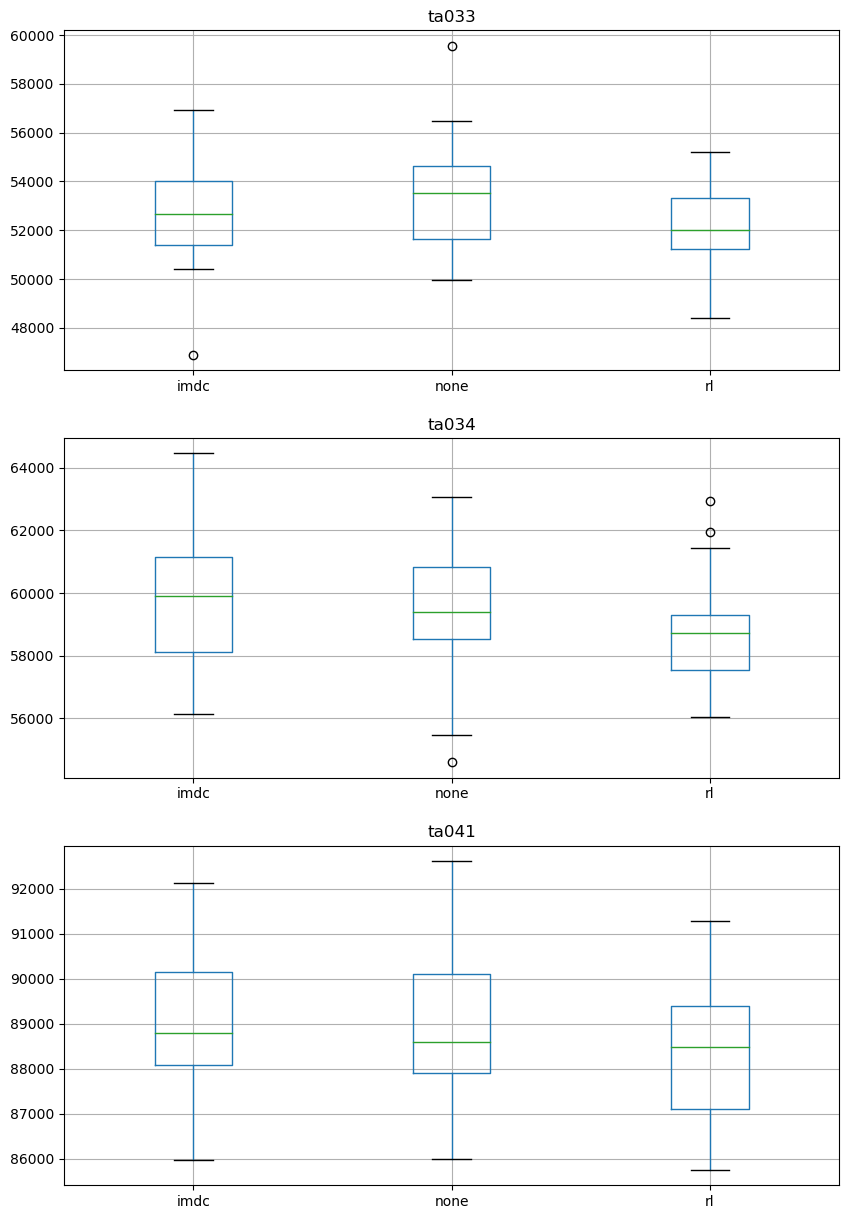

In [8]:
fig, axs = plt.subplots(3, 1, figsize=[10, 15])
axs=axs.flatten()
for idx, function in enumerate(list(data.Instance.unique())):
    data[(data.Instance == function) & (data.AdaptationMode != 'icdm')].groupby(['AdaptationMode']).boxplot(column='MinValue', subplots=False, ax=axs[idx])
    axs[idx].set_xticks([1, 2, 3], labels=['imdc', "none", 'rl'])
    axs[idx].set_title(f'{function}')

plt.savefig('boxplot_trained_on_multiple.svg', format='svg')
plt.show()
#plt.savefig('boxplot_train_and_test_on_f5.svg', format='svg')

In [4]:
plt.savefig('boxplot_train_and_test_on_f5.svg', format='svg')

<Figure size 640x480 with 0 Axes>

In [9]:
data.groupby(['Instance', 'AdaptationMode']).agg('mean').MinValue

C:\Users\lukas\AppData\Local\Temp/ipykernel_1044/697920408.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['Instance', 'AdaptationMode']).agg('mean').MinValue


Instance  AdaptationMode
ta033     icdm              54617.800000
          imdc              52791.033333
          none              53269.000000
          rl                52056.666667
ta034     icdm              60404.533333
          imdc              59861.133333
          none              59426.033333
          rl                58663.966667
ta041     icdm              90157.066667
          imdc              89013.800000
          none              88803.400000
          rl                88257.700000
Name: MinValue, dtype: float64

In [8]:
# Analyse Hyperparameter Optimierung
path = 'HyperparameterGAOpt_ta033_makespan.csv'
param_cols = ['config/crossover', 'config/cx_pb', 'config/mut_pb', 'config/pressure', 'config/pop_size']
hpo = pd.read_csv(path, sep=";", index_col=0)

In [9]:
grouped = hpo.groupby(param_cols).agg('mean').reset_index()

C:\Users\lukas\AppData\Local\Temp/ipykernel_23732/1847940373.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = hpo.groupby(param_cols).agg('mean').reset_index()


In [10]:
cols = ['config/crossover', 'config/mut_pb', 'config/cx_pb', 'config/pressure', 'config/pop_size', '_metric']
grouped.sort_values(by='_metric')[cols].head(50)

,config/crossover,config/mut_pb,config/cx_pb,config/pressure,config/pop_size,_metric
236,<class 'pymoo.operators.crossover.ux.UniformCr...,0.60,0.95,2,50,1862.333333
239,<class 'pymoo.operators.crossover.ux.UniformCr...,0.60,0.95,4,50,1867.666667
164,<class 'pymoo.operators.crossover.ux.UniformCr...,0.05,0.05,2,50,1875.800000
218,<class 'pymoo.operators.crossover.ux.UniformCr...,0.05,0.95,2,50,1883.100000
209,<class 'pymoo.operators.crossover.ux.UniformCr...,0.60,0.60,2,50,1896.333333
242,<class 'pymoo.operators.crossover.ux.UniformCr...,0.60,0.95,10,50,1899.111111
227,<class 'pymoo.operators.crossover.ux.UniformCr...,0.40,0.95,2,50,1901.888889
203,<class 'pymoo.operators.crossover.ux.UniformCr...,0.40,0.60,4,50,1905.142857
224,<class 'pymoo.operators.crossover.ux.UniformCr...,0.05,0.95,10,50,1905.800000
191,<class 'pymoo.operators.crossover.ux.UniformCr...,0.05,0.60,2,50,1908.375000
